In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df=pd.read_csv("C:/Users/P/Desktop/JupyterNotebook/Sample_Datas/tweets_train.csv")
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Data Cleaning

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [51]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt=re.sub(word,"",input_txt)
    return input_txt

In [52]:
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [53]:
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [54]:
tokenized_tweet=df['clean_tweet'].apply(lambda x:[" ".join([w for w in x.split() if len(w)>3])])
df.head()
tokenized_tweet

0        [when father dysfunctional selfish drags kids ...
1        [thanks #lyft credit cause they offer wheelcha...
2                                    [bihday your majesty]
3                             [#model love take with time]
4                         [factsguide society #motivation]
                               ...                        
31957                                         [that youuu]
31958    [nina turner airwaves trying wrap herself mant...
31959                [listening songs monday morning work]
31960    [#sikh #temple vandalised #calgary #wso condemns]
31961                                       [thank follow]
Name: clean_tweet, Length: 31962, dtype: object

In [55]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda s:[stemmer.stem(w) for w in s])
tokenized_tweet.head()

0    [when father dysfunctional selfish drags kids ...
1    [thanks #lyft credit cause they offer wheelcha...
2                                [bihday your majesti]
3                          [#model love take with tim]
4                          [factsguide society #motiv]
Name: clean_tweet, dtype: object

In [56]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]="".join(tokenized_tweet[i])
df['clean_tweet']=tokenized_tweet    
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with tim
4,5,0,factsguide: society now #motivation,factsguide society #motiv


# Data Analysis

In [59]:
!pip install wordcloud

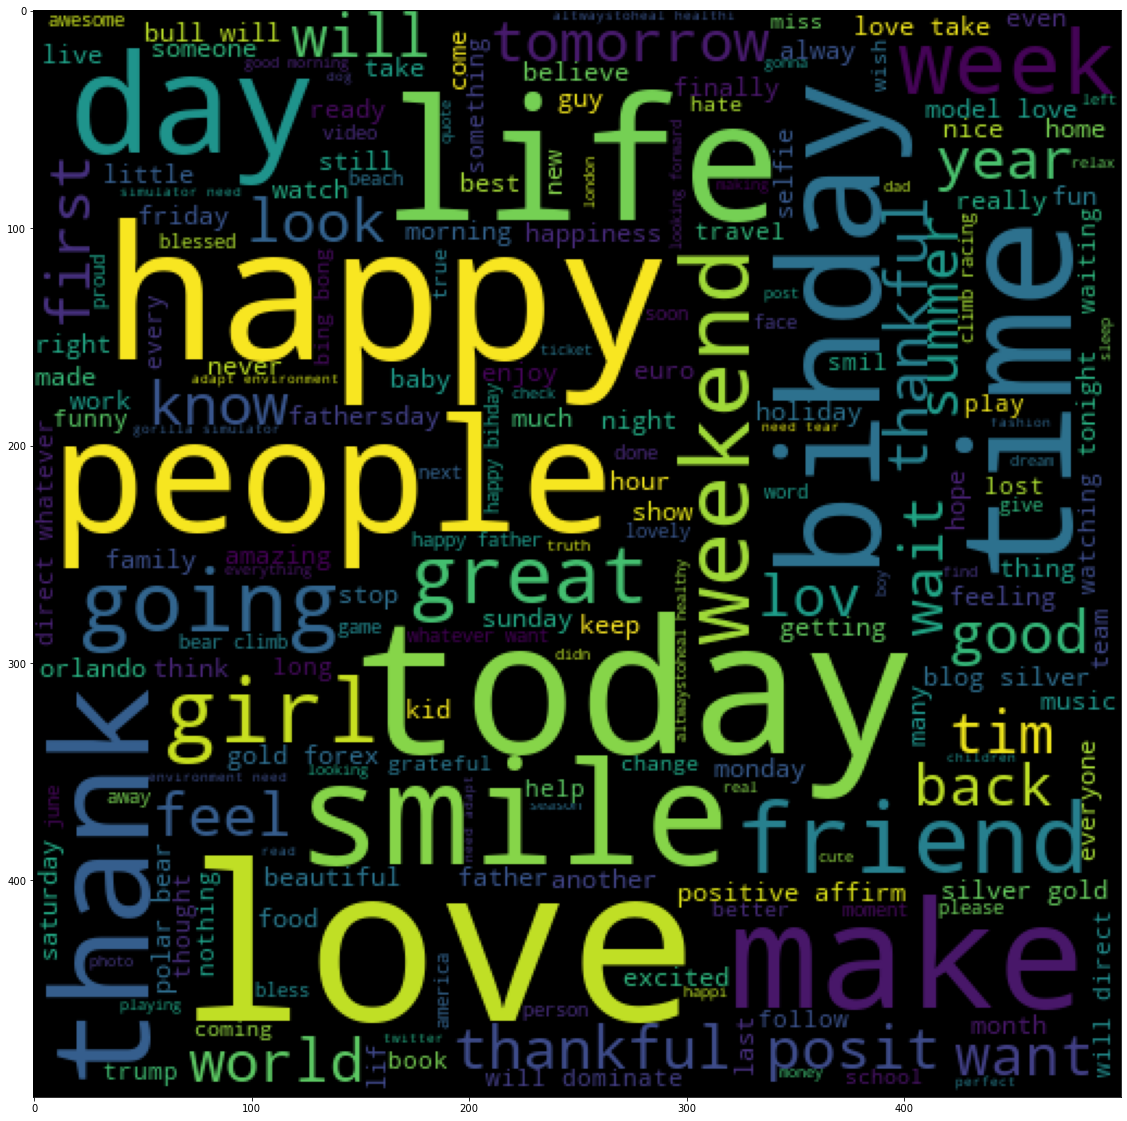

In [64]:
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,max_font_size=100).generate(all_words)
plt.figure(figsize=(20,20))
plt.imshow(wc)

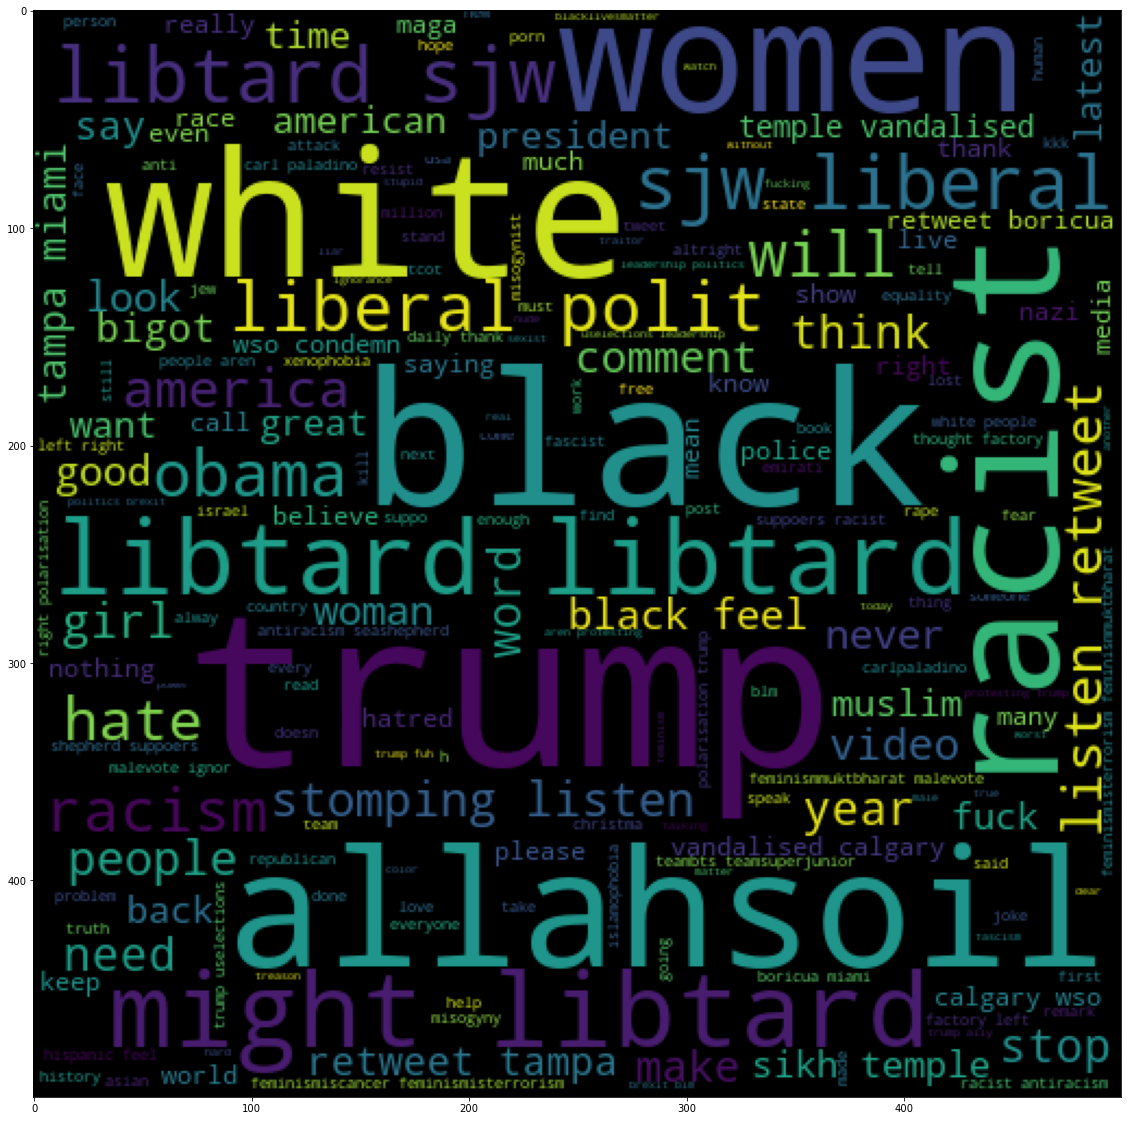

In [65]:
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])


wc=WordCloud(width=500,height=500,max_font_size=100).generate(all_words)
plt.figure(figsize=(20,20))
plt.imshow(wc)


In [74]:
def hashtag(tweet):
    hashtags=[]
    for word in tweet:
        ht=re.findall(r"#(\w*)",word)
        hashtags.append(ht)
    return hashtags


In [75]:
ht_positive=hashtag(df["clean_tweet"][df["label"]==0])
ht_negative=hashtag(df["clean_tweet"][df["label"]==1])
ht_positive

[['run'],
 ['lyft', 'disapointed', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'lov'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'posit'],
 ['friday', 'cookies'],
 [],
 ['euro'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'lov'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylor

In [76]:
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [80]:
freq=nltk.FreqDist(ht_positive)
df1= pd.DataFrame({'Hashtag':list(freq.keys()),
                  'Count':list(freq.values())})
df1.head()

,Hashtag,Count
0,run,41
1,lyft,2
2,disapointed,1
3,getthank,1
4,model,368


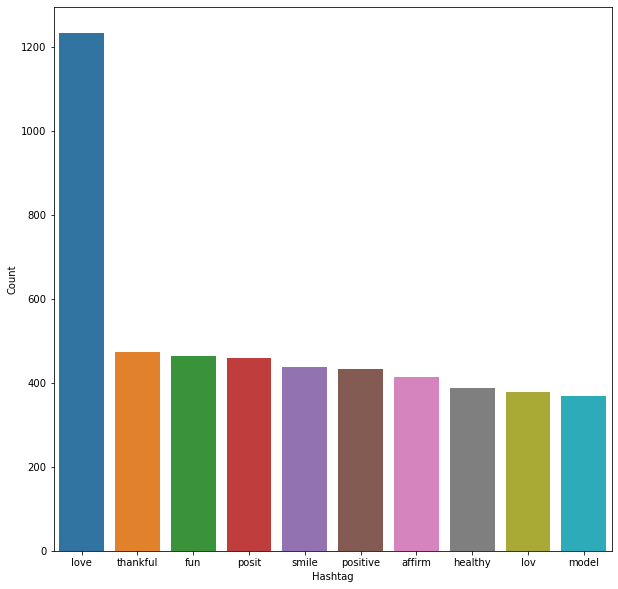

In [84]:
df1=df1.nlargest(columns='Count',n=10)
plt.figure(figsize=(10,10))
sb.barplot(data=df1,x='Hashtag',y='Count')
plt.show()

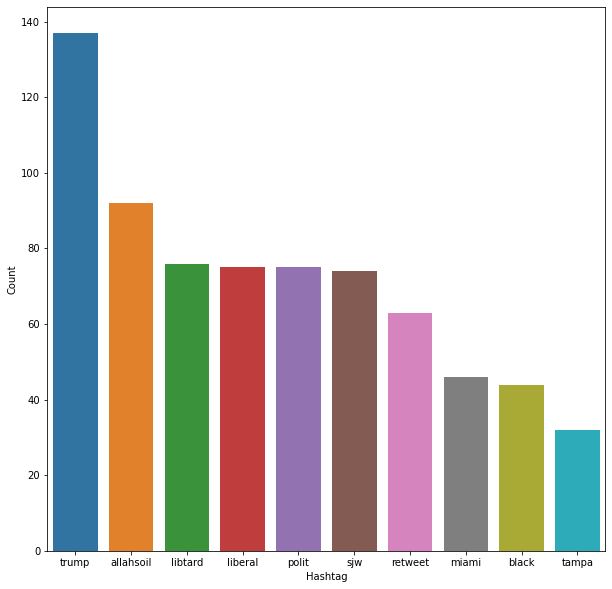

In [85]:
freq=nltk.FreqDist(ht_negative)
df2= pd.DataFrame({'Hashtag':list(freq.keys()),
                  'Count':list(freq.values())})
df2=df2.nlargest(columns='Count',n=10)
plt.figure(figsize=(10,10))
sb.barplot(data=df2,x='Hashtag',y='Count')
plt.show()


# Preprocessing

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
cvec=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
cv=cvec.fit_transform(df['clean_tweet'])

In [92]:
len(df['label'])

31962

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(cv,df['label'],test_size=0.2)

# Model Training

In [107]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [109]:
model.predict(x_test[:20])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [110]:
y_test[:20]

5025     0
11239    0
17035    0
21024    0
6726     0
18927    0
4845     0
31404    1
12522    0
17612    0
18869    0
9073     1
9730     0
22198    0
17809    0
17352    0
9028     0
3973     0
3258     0
17234    0
Name: label, dtype: int64

In [108]:
model.score(x_test,y_test)

0.9444705146253715

Accuracy using Logistic Regression (Machine Learning)= **94.44%**

# Using Deep Learning


In [123]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)


Epoch 1/5
800/800 [==============================] - 3s 2ms/step - loss: 0.2311 - accuracy: 0.9351
Epoch 2/5
800/800 [==============================] - 2s 2ms/step - loss: 0.1243 - accuracy: 0.9570
Epoch 3/5
800/800 [==============================] - 2s 2ms/step - loss: 0.1112 - accuracy: 0.9605
Epoch 4/5
800/800 [==============================] - 2s 2ms/step - loss: 0.0896 - accuracy: 0.9703
Epoch 5/5
800/800 [==============================] - 2s 2ms/step - loss: 0.0715 - accuracy: 0.9752


In [124]:
x_test=x_test.toarray()
model.evaluate(x_test,y_test)

200/200 [==============================] - 0s 1ms/step - loss: 0.2127 - accuracy: 0.9443


[0.2126998007297516, 0.9443141222000122]

The accuracy of the deep learning model is **94.43%**